### Suppose you are a public school administrator. Some schools in your state of Tennessee are performing below average academically. Your superintendent under pressure from frustrated parents and voters approached you with the task of understanding why these schools are underperforming. To improve school performance, you need to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers. The data includes various demographic, school faculty, and income variables. 
                                                    Objective
### Perform exploratory data analysis which includes determining the type of the data, correlation analysis over the same. You need to convert the data into useful information: Read the data in pandas data frame Describe the data to find more details Find the correlation between ‘reduced_lunch’and‘school_rating

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read a data from a dataframe.
df=pd.read_csv('middle_tn_schools.csv')
df.head(5)

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


# Based on the column names provided, it seems like the dataset contains information about schools in Tennessee, including various metrics such as school rating, size, demographics, and academic performance. Here's a brief description of each column:

1. **name**: The name of the school.
2. **school_rating**: The rating or performance score of the school.
3. **size**: The size of the school (presumably the number of students).
4. **reduced_lunch**: Percentage of students eligible for free or reduced-price lunch, often used as a proxy for socio-economic status.
5. **state_percentile_16**: State percentile rank of the school in the year 2016.
6. **state_percentile_15**: State percentile rank of the school in the year 2015.
7. **stu_teach_ratio**: The student-teacher ratio in the school.
8. **school_type**: Type of school (e.g., public, private).
9. **avg_score_15**: Average academic score achieved by students in the year 2015.
10. **avg_score_16**: Average academic score achieved by students in the year 2016.
11. **full_time_teachers**: The number of full-time teachers in the school.
12. **percent_black**: Percentage of black students in the school.
13. **percent_white**: Percentage of white students in the school.
14. **percent_asian**: Percentage of Asian students in the school.
15. **percent_hispanic**: Percentage of Hispanic students in the school.

This dataset appears to provide a comprehensive view of schools in Tennessee, including information about their size, demographics, academic performance, and other relevant metrics. With this data, you can perform various analyses and visualizations to gain insights into the educational landscape of the region.

In [4]:
df.shape  # 347 rows and 15 columns in a row.

(347, 15)

In [5]:
df.dtypes     # name and school_type are object datatype.

name                    object
school_rating          float64
size                   float64
reduced_lunch          float64
state_percentile_16    float64
state_percentile_15    float64
stu_teach_ratio        float64
school_type             object
avg_score_15           float64
avg_score_16           float64
full_time_teachers     float64
percent_black          float64
percent_white          float64
percent_asian          float64
percent_hispanic       float64
dtype: object

In [6]:
# remove name,school_type and create a new dataframe df1.
df1=df.drop(columns=['name','school_type'])
df1

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,5.0,851.0,10.0,90.2,95.8,15.7,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,2.0,412.0,71.0,32.8,37.3,12.8,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,4.0,482.0,43.0,78.4,83.6,16.6,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,0.0,394.0,91.0,1.6,1.0,13.1,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,4.0,948.0,26.0,85.3,89.2,14.8,81.3,79.6,64.0,11.8,71.2,7.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,3.0,611.0,57.0,59.1,65.2,16.9,61.4,57.7,36.0,15.2,66.3,1.5,15.7
343,5.0,515.0,8.0,93.9,97.0,14.3,92.0,89.3,36.0,3.3,87.4,3.1,4.1
344,4.0,424.0,55.0,84.8,76.7,14.1,69.4,79.4,30.0,11.6,70.5,2.1,9.7
345,5.0,866.0,2.0,93.3,97.1,19.2,89.8,84.9,45.0,4.5,77.6,10.0,4.4


In [7]:
df1.isna().any()   # empty values find in sate_percent and avg_score.

school_rating          False
size                   False
reduced_lunch          False
state_percentile_16    False
state_percentile_15     True
stu_teach_ratio        False
avg_score_15            True
avg_score_16           False
full_time_teachers     False
percent_black          False
percent_white          False
percent_asian          False
percent_hispanic       False
dtype: bool

In [8]:
# so fill the empty values from the mean this  .
from sklearn.impute import SimpleImputer

mean_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
mean_imputer=mean_imputer.fit(df1)
imputed_df1=mean_imputer.transform(df1.values)
df1=pd.DataFrame(data=imputed_df1,columns=df1.columns)
df1

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,5.0,851.0,10.0,90.2,95.8,15.7,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,2.0,412.0,71.0,32.8,37.3,12.8,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,4.0,482.0,43.0,78.4,83.6,16.6,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,0.0,394.0,91.0,1.6,1.0,13.1,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,4.0,948.0,26.0,85.3,89.2,14.8,81.3,79.6,64.0,11.8,71.2,7.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,3.0,611.0,57.0,59.1,65.2,16.9,61.4,57.7,36.0,15.2,66.3,1.5,15.7
343,5.0,515.0,8.0,93.9,97.0,14.3,92.0,89.3,36.0,3.3,87.4,3.1,4.1
344,4.0,424.0,55.0,84.8,76.7,14.1,69.4,79.4,30.0,11.6,70.5,2.1,9.7
345,5.0,866.0,2.0,93.3,97.1,19.2,89.8,84.9,45.0,4.5,77.6,10.0,4.4


In [9]:
df1.isna().any()  # now there is no empty values.

school_rating          False
size                   False
reduced_lunch          False
state_percentile_16    False
state_percentile_15    False
stu_teach_ratio        False
avg_score_15           False
avg_score_16           False
full_time_teachers     False
percent_black          False
percent_white          False
percent_asian          False
percent_hispanic       False
dtype: bool

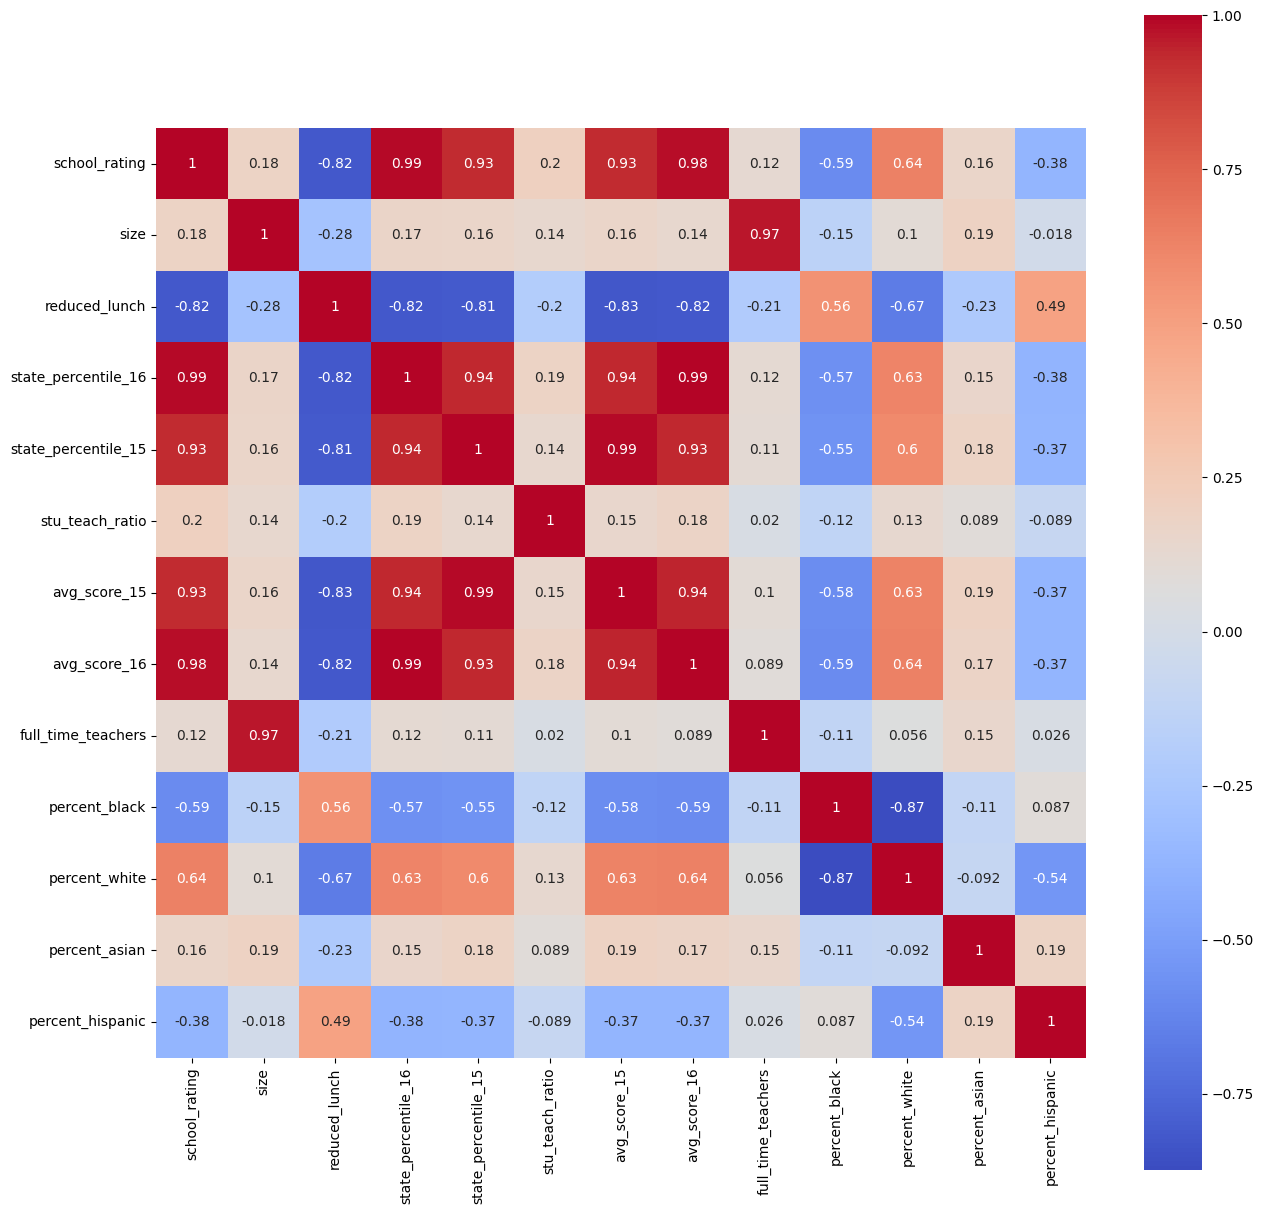

In [10]:
# plot a correlation heatmap of 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
correlation=df1.corr()

sns.heatmap(data=correlation,square=True,cmap="coolwarm",annot=True)


plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


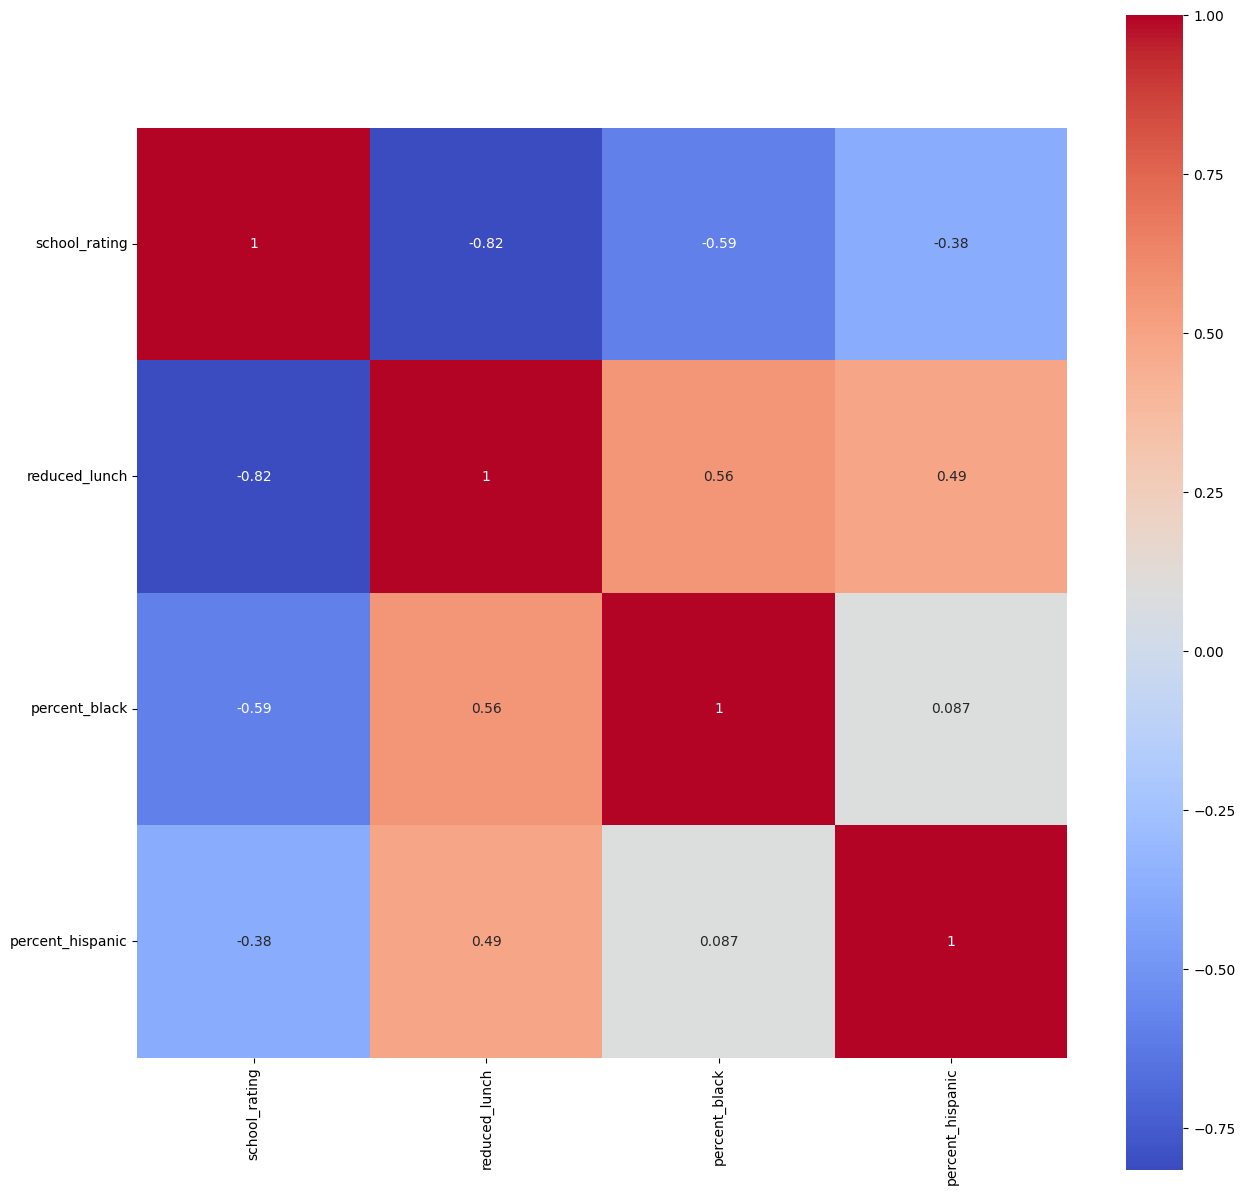

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
correlation=df1[['school_rating','reduced_lunch',"percent_black","percent_hispanic"]]
c=correlation.corr()

sns.heatmap(data=c,square=True,cmap="coolwarm",annot=True)


plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [12]:
df.head(5)

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


0.21197982708933719
0.6167348703170029
0.02642651296829971
0.11164553314121037


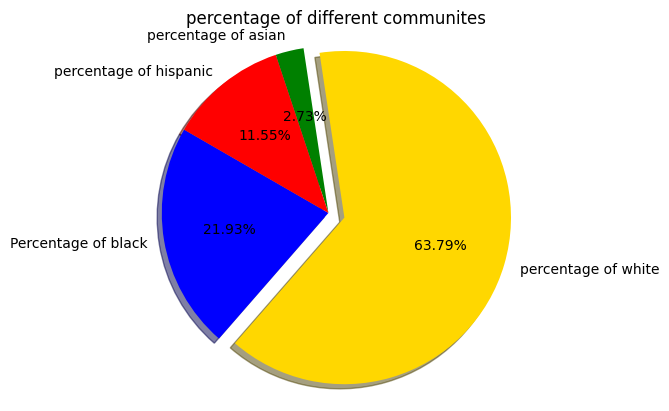

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# take a percentage of each columns.
percentage_black=(df1['percent_black'].sum()/len(df1['percent_black']))/100
print(percentage_black)

percentage_white=(df1['percent_white'].sum()/len(df1['percent_black']))/100
print(percentage_white)

percentage_asian=(df1['percent_asian'].sum()/len(df1['percent_asian']))/100
print(percentage_asian)

percentage_hispanic=(df1['percent_hispanic'].sum()/len(df1['percent_hispanic']))/100
print(percentage_hispanic)

# create a variable of data to store a data in one variable.
data=[percentage_black,percentage_white,percentage_asian
      ,percentage_hispanic]

# create variables of labels to put labels in a pie plot.
labels=['Percentage of black',"percentage of white","percentage of asian"
       ,"percentage of hispanic"]

# create a variable colors.
color=['b','gold','green','r']
explode=[0,0.1,0,0]

plt.pie(data,labels=labels,colors=color,autopct='%1.2f%%',shadow=True
        ,startangle=150,explode=explode)

# put a title in a pie chart.
plt.title('percentage of different communites')
plt.axis("equal")
plt.show()

# above pie chart shows the percentage of all communites in the middle_tn_schools

# Here are the approximate median family income figures for different racial and ethnic communities in the United States based on 2015-2016 ACS data:

- White (non-Hispanic): Approximately $63,000 - $70,000 per year.
- Asian: Approximately $78,000 - $85,000 per year.
- Hispanic or Latino: Approximately $45,000 - $52,000 per year.
- Black or African American: Approximately $38,000 - $45,000 per year.

# To determine the income thresholds for reduced-price or free school lunch eligibility in Middle Tennessee for these years, we can use the following calculations:

- 1.Free Lunch Eligibility:

    - For a family of four:

    - 130% of the poverty guideline for 2015: approximately $31,525
  
    - 130% of the poverty guideline for 2016:approximately $31,590
  

- 2. Reduced-Price Lunch Eligibility:

     - For a family of four:

     - 185% of the poverty guideline for 2015: approximately $44,913
  
     - 185% of the poverty guideline for 2016: approximately $44,955

In [19]:
x=df1[['school_rating','full_time_teachers']]
x.head(10)

,school_rating,full_time_teachers
0,5.0,54.0
1,2.0,32.0
2,4.0,29.0
3,0.0,30.0
4,4.0,64.0
5,4.0,64.0
6,4.0,42.0
7,5.0,39.0
8,4.0,85.0
9,3.0,41.0


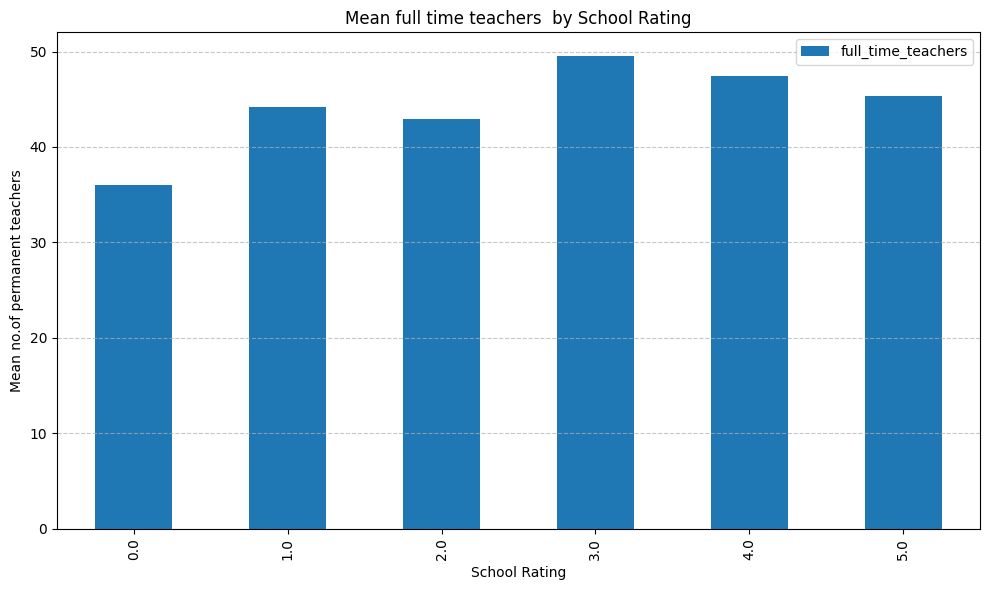

In [30]:
data=df1[['school_rating', 'full_time_teachers']]
# Group the data by school rating and calculate mean student-teacher ratio for each rating
mean_ratio_by_rating = data.groupby('school_rating').mean()

mean_ratio_by_rating.plot(kind='bar',figsize=(10,6))

plt.title('Mean full time teachers  by School Rating')
plt.xlabel('School Rating')
plt.ylabel('Mean no.of permanent teachers')
  # Rotate x labels if needed
    
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
